# Trajectories

<br>

***

In this notebook, we will explore the trajectories in event data and introduce some techniques for their effective visualization.

First, let's clarify what we mean by a trajectory:

> **Definition**: For an event function $t>0\mapsto (x(t),\ y(t),\ p(t))$, the $x$ trajectory is defined as the function $t\mapsto x(t)$, similarly, the $y$ trajectory is the function $t\mapsto y(t)$.

Given a collection of events $(x_i, y_i, p_i, t_i)_{1\leq i\leq n}\ $, we treat $t_i\mapsto x_i$ and $t_i\mapsto y_i,\ 1\leq i\leq n$ as noisy approximations of the actual $x$ and $y$ trajectories.

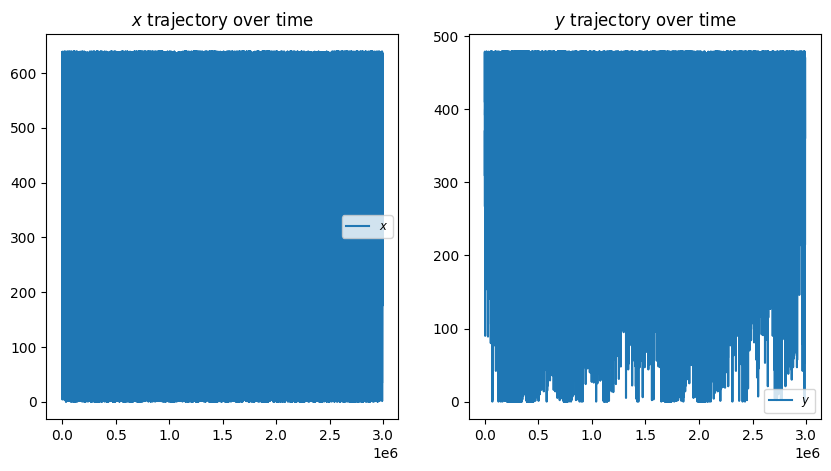

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

column_names = ['x', 'y', 'p', 't']
test_event_df = pd.read_csv('train10/train10/Addition/0.csv', header=None, names=column_names)

x = test_event_df['x']
y = test_event_df['y']
t = test_event_df['t']

fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create two subplots side by side

# Plot for x over time
axs[0].plot(t, x, label='$x$')
axs[0].set_title('$x$ trajectory over time')
axs[0].legend(fontsize='small')

# Plot for y over time
axs[1].plot(t, y, label='$y$')
axs[1].set_title('$y$ trajectory over time')
axs[1].legend(fontsize='small')

plt.show()

***

Event data often contains a lot of discrete points, which can make the trajectory look like a full square when plotted. One way to effectively visualize event trajectories is to use a scatter plot instead of a line plot. This allows you to see the individual events as points in the plot.

Here's an example:


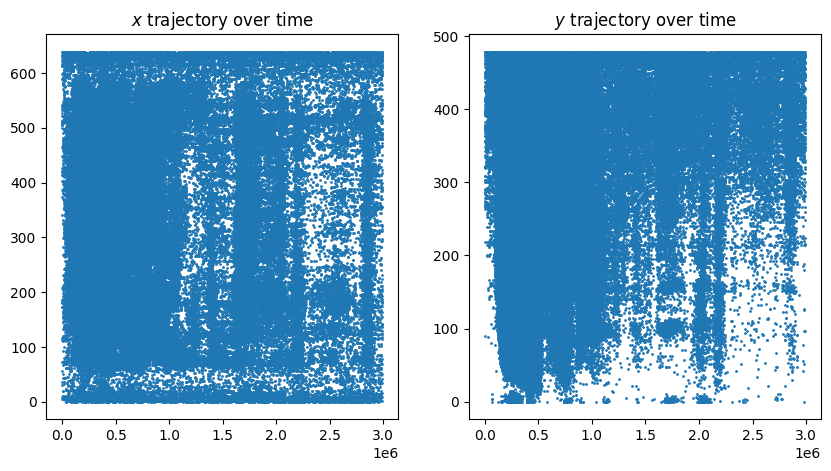

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

column_names = ['x', 'y', 'p', 't']
test_event_df = pd.read_csv('train10/train10/Addition/0.csv', header=None, names=column_names)

x = test_event_df['x']
y = test_event_df['y']
t = test_event_df['t']

fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create two subplots side by side

# Scatter plot for x over time
axs[0].scatter(t, x, s=1)  # s parameter adjusts the size of the points
axs[0].set_title('$x$ trajectory over time')

# Scatter plot for y over time
axs[1].scatter(t, y, s=1)  # s parameter adjusts the size of the points
axs[1].set_title('$y$ trajectory over time')

plt.show()


Another approach is to aggregate or bin the data in some way before plotting. For example, we calculate a moving average of the $x$ and $y$ trajectories over a fixed number of consecutive events.

This would smooth out the trajectory and make it easier to see any trends or patterns in the data.

Here's an example of how to calculate and plot a moving average of the $x$ and $y$ trajectories:


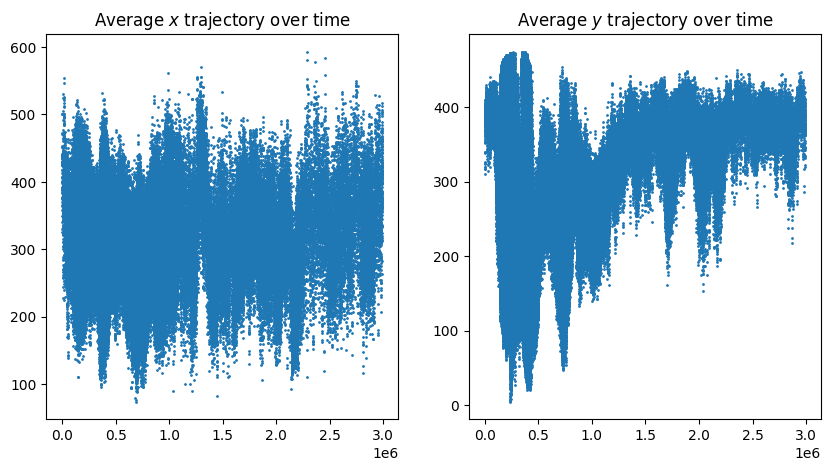

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

column_names = ['x', 'y', 'p', 't']
test_event_df = pd.read_csv('train10/train10/Addition/0.csv', header=None, names=column_names)

# Calculate moving averages
window_size = 10  # adjust this to change the number of events to average over
test_event_df['x_avg'] = test_event_df['x'].rolling(window_size).mean()
test_event_df['y_avg'] = test_event_df['y'].rolling(window_size).mean()

x_avg = test_event_df['x_avg']
y_avg = test_event_df['y_avg']
t = test_event_df['t']

fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create two subplots side by side

# Plot for x over time
axs[0].scatter(t, x_avg, s=1)
axs[0].set_title('Average $x$ trajectory over time')

# Plot for y over time
axs[1].scatter(t, y_avg, s=1)
axs[1].set_title('Average $y$ trajectory over time')

plt.show()



In this code, `window_size` is the number of consecutive events to average over. You can adjust this value to change the amount of smoothing.